In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import os
import numpy as np
import cv2

In [3]:
dir = 'C:\\Users\\HP\\anaconda3\\Research_Papaya\\Untouch_DataSet_1\\Input_DataSet'

categories = ['anthracnose_1','black_spot_1','phytophthora_1','powdery_mildew_1','ring_spot_1']
data = []

for category in categories:
    path = os.path.join(dir,category)
    label= categories.index(category) 
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        papaya_img=cv2.imread(imgpath,0)
        try:
            papaya_img=cv2.resize(papaya_img,(50,50))
            image = np.array(papaya_img).flatten()
        
            data.append([image,label])
        except Exception as e:
            pass
        
        
print(len(data))

54462


In [4]:
import pickle
import random
from sklearn.model_selection import train_test_split


pick_in=open('decisionTree.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [5]:
pick_in=open('decisionTree.pickle','rb')
data = pickle.load(pick_in)
pick_in.close()

In [6]:

from sklearn import tree

features = []
labels = []
random.shuffle(data)

for feature, label in data:
    features.append(feature)
    labels.append(label)

    
xtrain, xtest, ytrain, ytest = train_test_split(features,labels, test_size = 0.98)
model = tree.DecisionTreeClassifier()
model.fit(xtrain, ytrain)

pick = open('decisiontree.sav','wb')
pickle.dump(model,pick)
pick.close()

Accuracy:   0.3458864969179173
Prediction is  :  powdery_mildew_1


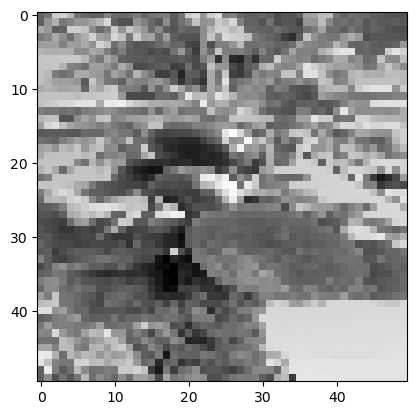

In [7]:
pick = open('decisiontree.sav','rb')
model = pickle.load(pick)
pick.close()

prediction=model.predict(xtest)
accuracy = model.score(xtest, ytest)

categories = ['anthracnose_1','black_spot_1','phytophthora_1','powdery_mildew_1','ring_spot_1']

print('Accuracy:  ', accuracy)
print('Prediction is  : ',categories[prediction[0]])


mypapaya=xtest[0].reshape(50,50)
plt.imshow(mypapaya,cmap='gray')
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(xtest)
cm = confusion_matrix(ytest, y_pred)
cm

array([[1489, 1424,  966, 1650, 1012],
       [1472, 2977, 2816, 3434, 1416],
       [1244, 2436, 3893, 2517, 1133],
       [1461, 2494, 2559, 8786, 1486],
       [ 993, 1291, 1126, 1982, 1316]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

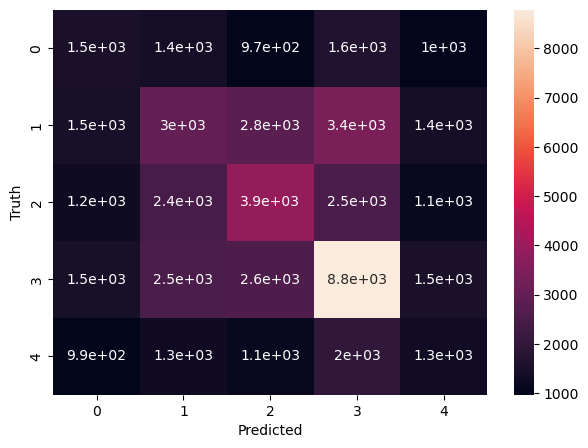

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [10]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.22      0.23      0.23      6541
           1       0.28      0.25      0.26     12115
           2       0.34      0.35      0.34     11223
           3       0.48      0.52      0.50     16786
           4       0.21      0.20      0.20      6708

    accuracy                           0.35     53373
   macro avg       0.31      0.31      0.31     53373
weighted avg       0.34      0.35      0.34     53373

